# CME 252: Homework 3
## AJ Friend
## Due: Saturday, October 24, 11:59pm

This homework will be done entirely inside of this IPython/Jupyter Notebook. There won't be a self-grading script, but you'll be able to check your work by plotting the solution.

Once you have filled in the required code and produced plots, **save the notebook** and submit your completed `hw3.ipynb` to this Dropbox File Request link: <https://www.dropbox.com/request/7wlQNgq9Eqr62fJFH3Xq>

In [1]:
# Please fill in your name and email address in the variables below.
name = "YOUR NAME"
stanford_email = "yourname@stanford.edu"

# Helper Function Definitions and Problem Data
Run these cells, but you don't have to understand them now. They simply define helper functions and data you'll use for the homework.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from cvxpy import *
from __future__ import print_function

def powers(n,d):
    """ Nonnegative integer tuples of length n which sum to <= d.
    Returns a generator.
    """
    if n == 1:
        for i in range(d+1):
            yield (i,)
    else:
        for i in range(d+1):
            for p in powers(n-1,d):
                t = p + (i,)
                if sum(t) <= d:
                    yield t
                    
                    
def poly(X,d):
    """ Form polynomial "features" for data matrix X.
    Features are monomials of columns of X, with powers <= d.
    
    X is N by n: N examples with n features each.
    
    Returns: Y: N by m matrix, where m is the number of
    polynomial features, a function of n and d.
    
    >>> import sympy as sp
    >>> x,y,a,b = sp.symbols('x y a b')
    >>> v = np.array([[x,y],[a,b]])
    >>> print(poly(v,2))
    
    [[1 x x**2 y x*y y**2]
     [1 a a**2 b a*b b**2]]
     
    >>> print(poly(v,3))
    [[1 x x**2 x**3 y x*y x**2*y y**2 x*y**2 y**3]
     [1 a a**2 a**3 b a*b a**2*b b**2 a*b**2 b**3]]
    """
    
    n = X.shape[-1]
    
    result = []
    for p in powers(n,d):
        col = 1
        for i, pi in enumerate(p):
            col *= X[...,i]**pi
        result.append(col)
    return np.vstack(result).T

def poly_plot(X, y, d, w):
    """ Plot polynomial separator for data X with labels y.
    d is degree of polynomial of X
    w gives weights of polynomial terms
    
    For example, if d=3, and the first row of X is [x,y]
    then w would give the coefficients to the polynomial terms
    [1 x x**2 x**3 y x*y x**2*y y**2 x*y**2 y**3]
    
    """

    line_alpha = .9
    
    plt.scatter(X[:,0], X[:, 1], c=y, s=75, cmap='cool', alpha=.7)

    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)

    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            v = np.array([xi, yj])
            v = poly(v,d)
            P[i, j] = v.dot(w)

    levels=[0, -1, 1]
    linestyles=['-', '--', '--']

    plt.contour(X, Y, P, colors='k',
               levels=levels, alpha=line_alpha,
               linestyles=linestyles)
    
# Problem data
X = np.array([-0.01,  0.99,  1.97, -0.11,  0.92, -0.01, -0.02,  0.04,  0.9 ,
       -0.53,  2.05,  0.48,  0.55,  0.51,  0.94, -0.67, -0.01,  0.34,
        1.8 ,  0.32, -0.18,  0.51,  1.97, -0.18,  1.41, -0.66,  1.04,
        1.05,  0.61,  0.51, -0.36,  1.06,  0.25,  1.15,  0.21,  0.88,
       -0.33,  0.8 ,  1.07,  0.53, -0.71,  0.56,  0.4 , -0.2 ,  0.78,
        0.57,  0.73, -0.46, -0.76, -0.  , -0.83, -0.23,  0.71,  0.33,
        2.12,  0.15,  1.77, -0.01,  1.35, -0.24,  0.38, -0.13,  1.15,
       -0.84,  1.86, -0.02,  0.48, -0.35,  0.05,  0.52, -0.17,  1.  ,
        0.22,  0.97,  0.15,  0.21, -0.06,  0.05,  1.01, -0.58,  1.35,
       -0.01,  0.51, -0.31, -0.88,  0.18, -1.  ,  0.25,  1.01,  0.34,
        0.81,  1.2 ,  0.61,  1.34, -0.53,  0.67, -0.94,  0.32,  0.83,
        0.21,  1.56, -0.  , -0.2 , -0.17,  0.81,  0.3 , -0.53,  0.73,
        0.14,  0.52,  0.13,  0.27,  0.61,  0.87, -0.36,  0.43,  0.18,
        1.21, -0.07,  0.5 ,  0.69,  0.7 , -0.38,  0.97,  0.3 , -0.18,
        0.12, -0.23,  0.9 , -0.69,  1.27, -0.34, -0.25,  0.94,  1.58,
       -0.53,  0.7 ,  0.65,  2.05, -0.5 ,  0.28,  0.88, -0.73,  0.92,
       -0.92,  0.05,  2.01,  0.21,  2.1 ,  0.45,  0.46, -0.6 ,  0.33,
        1.06,  1.81,  0.37,  0.71, -0.46,  1.24, -0.49, -0.1 ,  1.16,
       -0.61,  0.94,  1.33, -0.28, -0.91,  0.4 , -0.89, -0.1 ,  0.16,
       -0.04,  0.17, -0.04,  0.73,  0.42,  1.71, -0.18,  0.58, -0.23,
        1.68, -0.35, -0.77,  0.67,  0.28,  0.85,  1.42, -0.66,  1.06,
        0.58,  1.79,  0.49,  0.32, -0.56,  0.76, -0.37, -1.21,  0.32,
       -1.18,  0.23]).reshape(100,2)

y = np.array([-1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1,
        1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1])

# Problem 1: Nonlinear Support Vector Classifier
You are to fit a nonlinear support vector classifier to data using polynomial features.

That is, you want to find weights $w$ such that the decision function

$$
f(x) = \sum_{j_1 + \cdots + j_n \leq d} w_{j_1 \cdots j_n} x_1^{j_1} \cdots x_n^{j_n}
$$

correctly classifies data points $x_i$ with labels $y_i \in \lbrace +1,-1 \rbrace$ such that
$$
y_i f(x_i) > 0 
$$
holds true as generally as possible.

## Data
- $X \in \mathbf{R}^{100 \times 2}$ gives 100 data points in 2D
- $y \in \mathbf{R}^{100}$ gives 100 positive or negative labels 

The data is plotted below, with a poor linear separator.

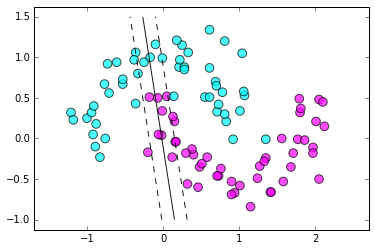

In [4]:
w = np.array([.1,6,1])
poly_plot(X, y, 1, w)
# don't worry if this cell raises a warning the first time you plot. You can ignore it.

## Polynomial Features
The function `poly(X,d)` forms polynomial features for data matrix $X$.
Features are monomials of columns of $X$, with powers whose sum is $\leq d$.

For example, for data with 2 examples in 2D:

``X = np.array([[x,y],[a,b]])``

`poly(X,2)` will return the same number of examples, with
the 6 degree 2 (`d=2`) features
```
[[1 x x**2 y x*y y**2]
 [1 a a**2 b a*b b**2]]
```

Note that the first feature is always `1`, corresponding to all powers of 0.

For the 3rd degree polynomial features, we get the matrix
`Z = poly(X,3)` with elements
```
[[1 x x**2 x**3 y x*y x**2*y y**2 x*y**2 y**3]
 [1 a a**2 a**3 b a*b a**2*b b**2 a*b**2 b**3]]
```

The new "polynomial" feature matrix `Z` is the one will we use to fit our nonlinear model.

## Weights
Your goal is to find weights $w$ for the feature matrix $Z$ such that `np.sign(mul_elemwise(y, Z*w))` predicts the correct label as often as possible.

Note that the size of the weight vector $w$ will depend on the number of columns of $Z$, which will depend on the dimension of the original examples in $X$ (but which will be fixed at 2) and the degree of the polynomial features
you generate with `Z = poly(X,d)`.


## Plotting
Once you've chosen a degree $d$ and fit your model to the data `Z = poly(X,d)` to obtain weights $w$, you can plot your nonlinear separator with the `poly_plot(X,y,d,w)` function. `X` and `y` are the original data, `d` is the degree of the polynomial features you generated, and `w` is a NumPy array of weights.

Remember that the length of $w$ will depend on $d$ (and the number of columns in $X$), so make sure that these match up appropriately.

You saw an $d=1$ example above, where `len(w) == 3`. Below, you'll see an example with $d=2$, so that `len(w) == 6`.

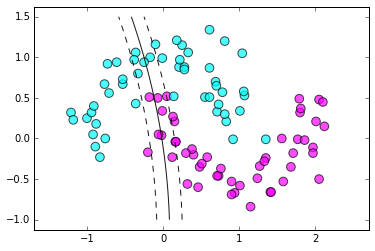

In [5]:
d = 2
w = np.array([.1,6,0,1,0,.4])
poly_plot(X, y, d, w)

## Your Task

Fill in the code below to solve a CVXPY model to produce weights $w$. Plot the result with the `poly_plot` cell below.
Save the notebook `hw3.ipynb` so that I can see your code for the final model and the plot **without having to run your code**. If you save the notebook with your plot showing, that should suffice. Mention in the code below which loss function and regularizer your chose.

Feel free to play with a few different degrees $d=1,2,3,4,\ldots$ to find a fit that looks good.
Also feel free to play with a few different models and loss functions that we discussed in class.


## Tips
- Don't worry about getting a "perfect" separator. Anything that looks reasonable will get credit
- Keep your CVXPY code short and clean
- You may not want to regularize the "y-intercept" term $w_0$ since it doesn't affect the width of the separating slab
- `w[1:]` is the array (in NumPy or CVXPY) of all elements of $w$, excluding the first "y-intercept" term

## Code (to be graded):

In [22]:
# loss function: <fill in>
# regularizer: <fill in>

d = "<fill me in>"

Z = poly(X,d)
N,n = Z.shape

w = Variable(n)

obj = Minimize(...)
constr = [...]
prob = Problem(obj, constr)
prob.solve()

w = np.array(w.value).flatten()

## Plot (to be graded):

In [ ]:
poly_plot(X, y, d, w)